Name: Dharmik Kakadiya<br>Student ID: 8918216

# CSCN8000 – Artificial Intelligence Algorithms and Mathematics
## Lab 3 – Logistic Regression

### Data Preprocessing Tasks

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Load data
df = pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Detect and handle outliers
for column in df.columns:
    if column != 'Class':
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define the bounds for the outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Handling outliers by capping at the whiskers
            df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [4]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler

df['Normalized Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)
df = df.drop(['Time'],axis=1)
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.611875 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class  Normalized Amount 

### Descriptive Analytics Tasks

#### 1. Analyze the distribution of fraud vs non-fraud transactions and comment on it.

In [5]:
# Import libraries for plotting
import matplotlib.pyplot as plt

In [6]:
# Get the fraud counts
print(df['Class'].value_counts())

fraud_counts = df['Class'].value_counts(normalize=True) * 100
print(fraud_counts)

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


Comments:<br>The distribution of fraud vs non-fraud transactions is highly imbalanced.<br>There are 492 (0.172%) fraud transactions and 284,315 (99.827%) non-fraud transactions.

#### 2. Analyze the correlation between fraud/non-fraud transactions and all the other numerical features. Comment on which features have the highest correlation with the target variable.

In [7]:
# Correlation matrix
correlation_matrix = df.corr()
fraud_correlation = correlation_matrix['Class'].sort_values(ascending=False)

In [8]:
print("Features with the highest positive correlation with 'Class':")
print(fraud_correlation[1:].head())
print("\nFeatures with the highest negative correlation with 'Class':")
print(fraud_correlation.tail())

Features with the highest positive correlation with 'Class':
V11    0.096491
V4     0.083385
V2     0.067842
V21    0.047871
V27    0.031643
Name: Class, dtype: float64

Features with the highest negative correlation with 'Class':
V7    -0.071433
V10   -0.082732
V12   -0.083688
V14   -0.086499
V3    -0.088856
Name: Class, dtype: float64


Comments:<br>The features with the highest positive correlation with 'Class' are V11, V4, V2, V21, and V27.<br>
The features with the highest negative correlation with 'Class' are V7, V10, V12, V14, and V3.

#### 3. From the previous step, choose the 10 features with highest correlation with the target variable, and plot their distributions against the fraud/non-fraud transactions.


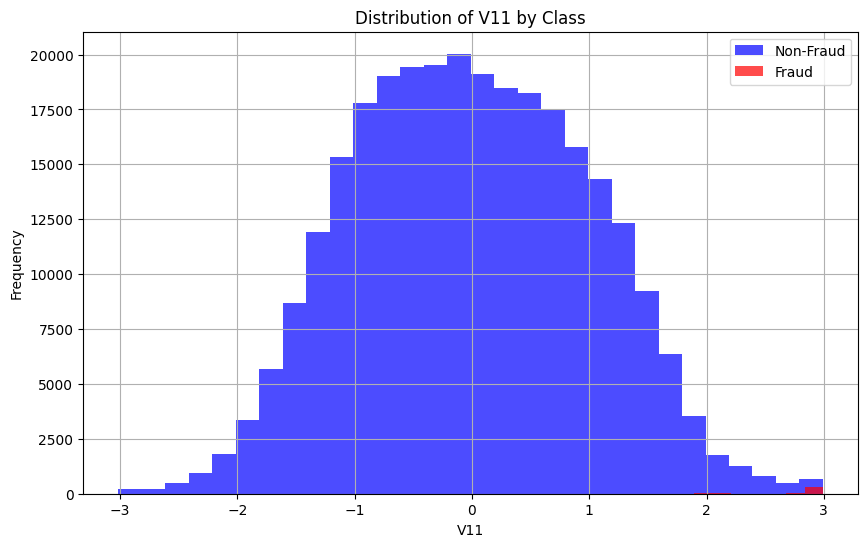

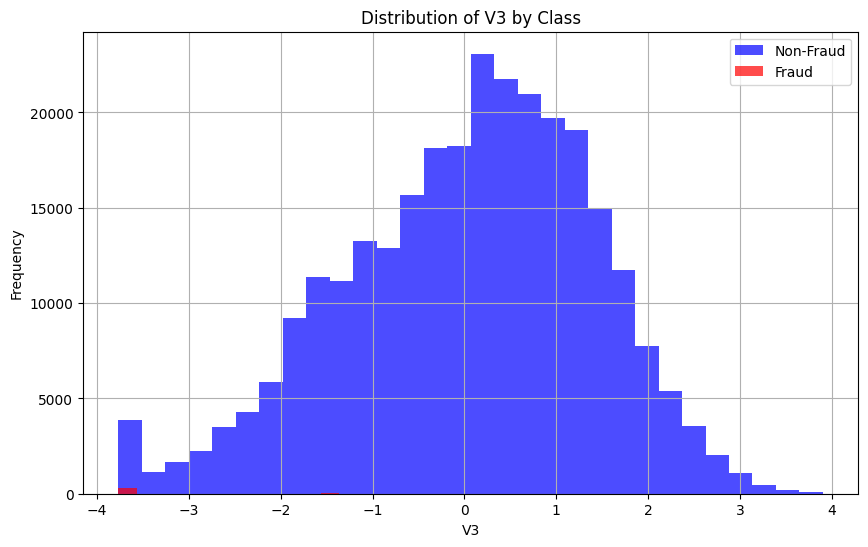

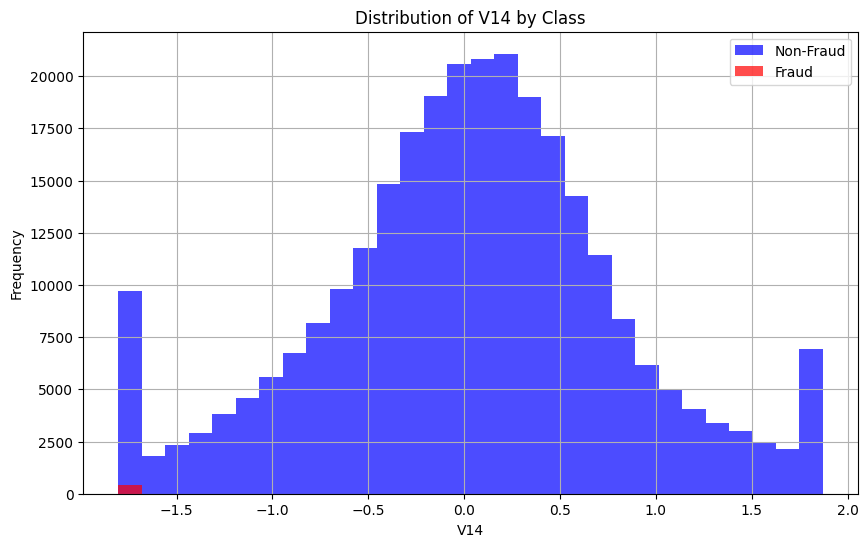

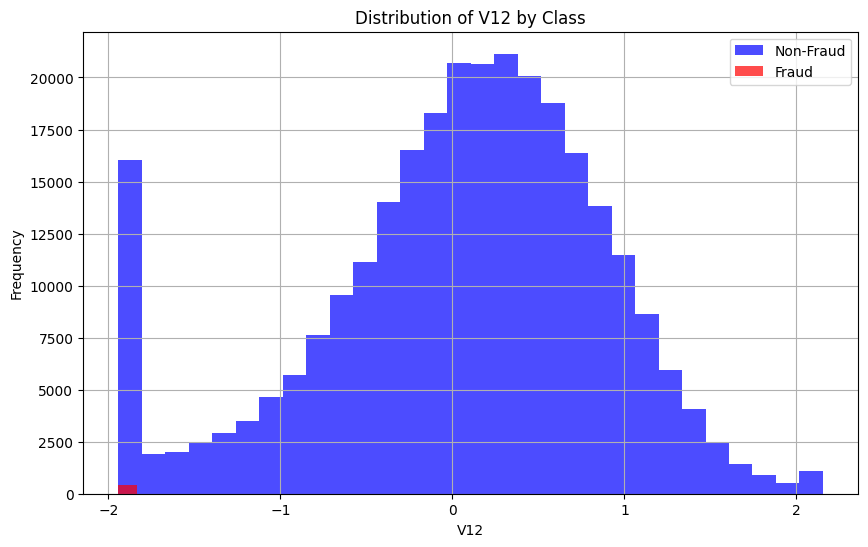

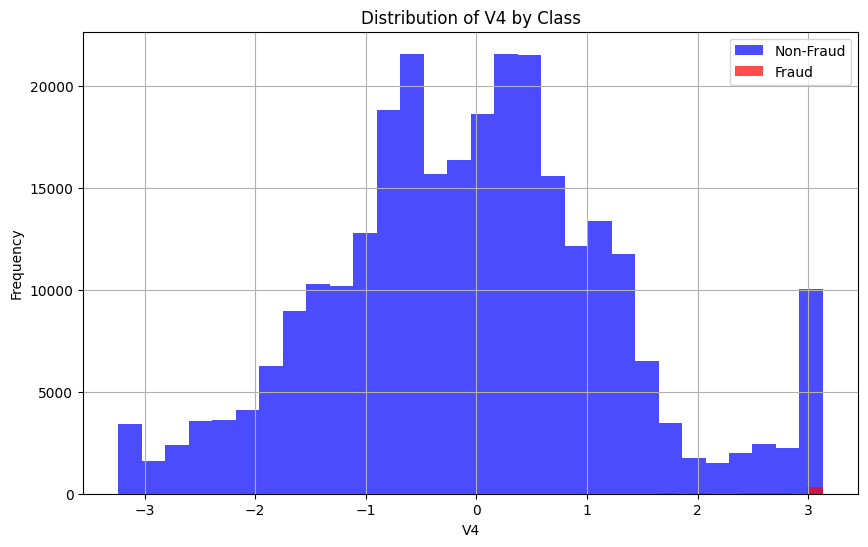

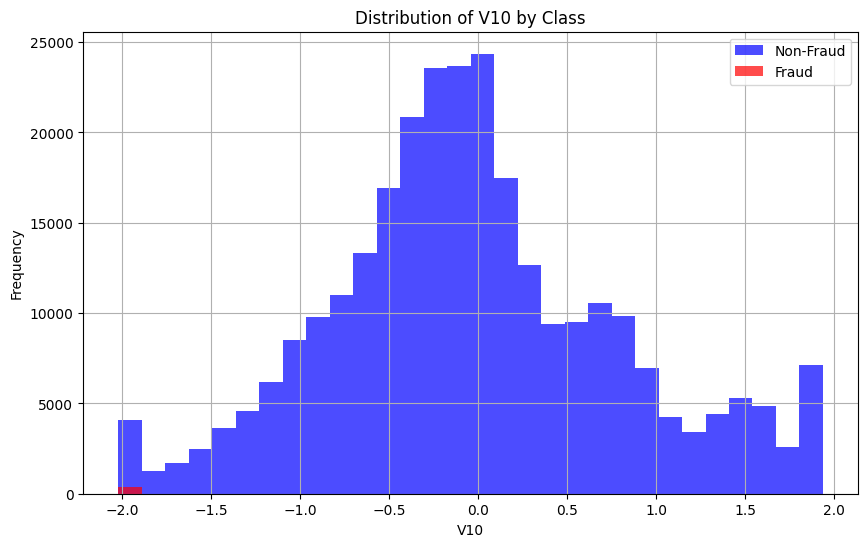

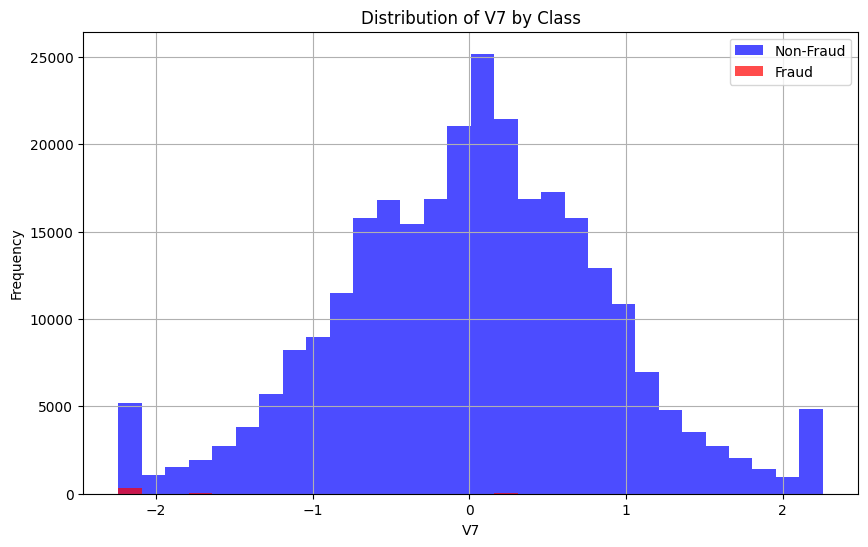

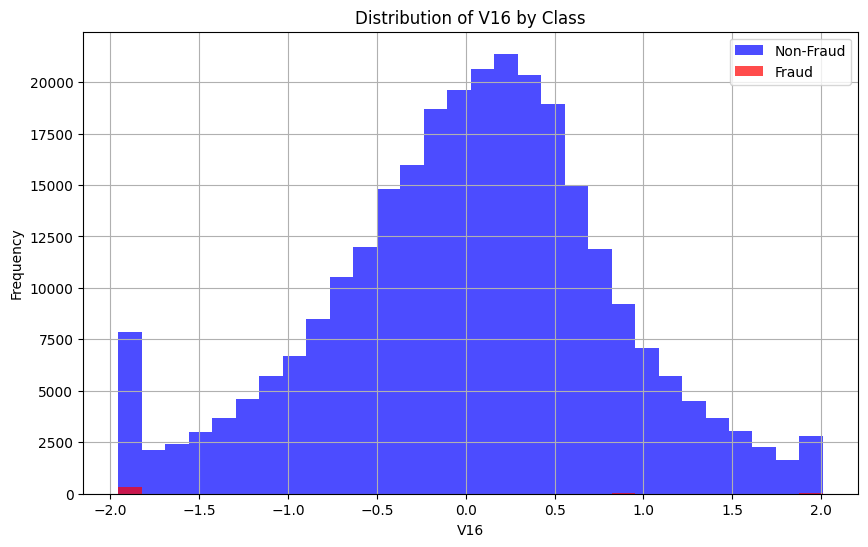

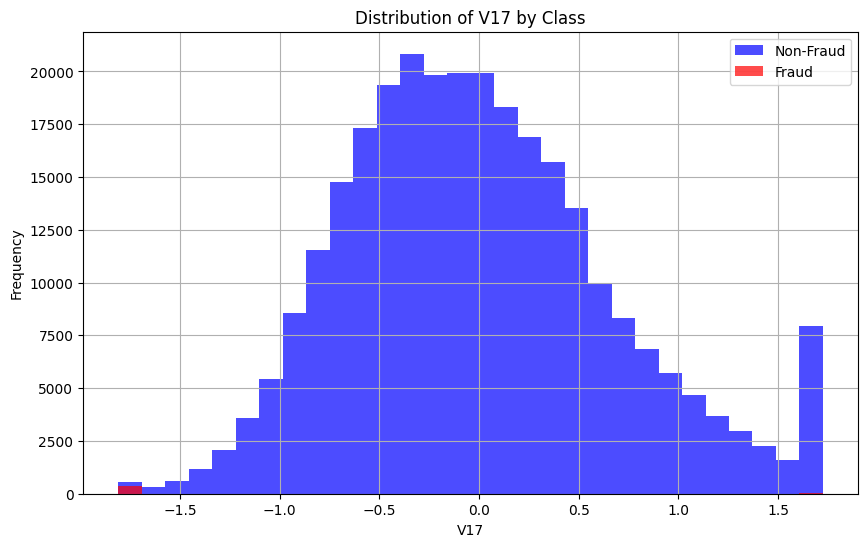

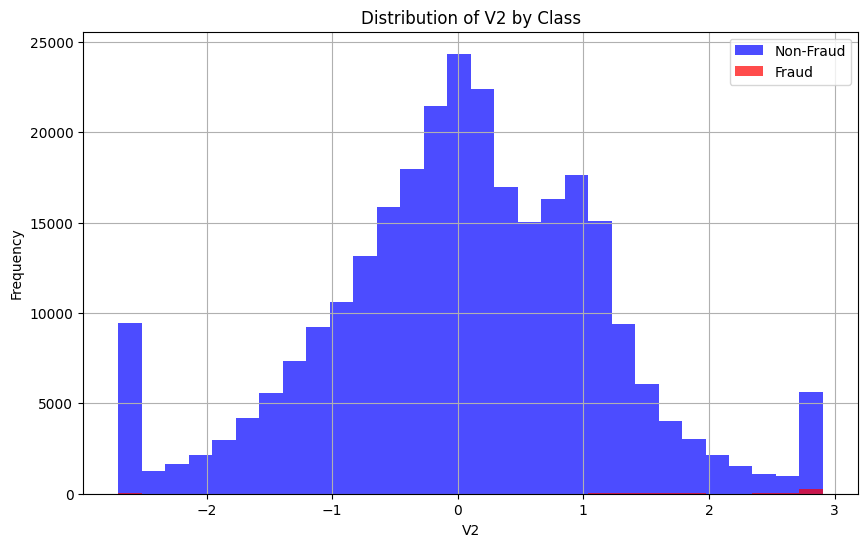

In [9]:
# Plot the features with the highest correlation with 'Class'
features_to_plot = fraud_correlation[1:].abs().sort_values(ascending=False).head(10).index

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    df[df['Class'] == 0][feature].hist(alpha=0.7, bins=30, label='Non-Fraud', color='blue')
    df[df['Class'] == 1][feature].hist(alpha=0.7, bins=30, label='Fraud', color='red')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of {feature} by Class')
    plt.show()

### ML Model Training and Testing Tasks

#### 1. Split the cleaned data into training and testing sets (e.g., 80% training, 20% testing).

In [10]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2. Use 5-fold cross-validation to train and validate the performance of all the models in this section.<br>3. Train a logistic regression model as a baseline model.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [12]:
# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression 5-fold CV Accuracy: {np.mean(log_reg_scores)}")

Logistic Regression 5-fold CV Accuracy: 0.9993811582435427


#### 4. Print the learned coefficients (weights) of the model. Comment on which feature the model gave higher weight to in the weight vector.

In [13]:
# Fit the model to the training data to get the coefficients
log_reg.fit(X_train, y_train)

# Print the learned coefficients
print("Logistic Regression Coefficients:")
print(log_reg.coef_)

Logistic Regression Coefficients:
[[ 0.17418465 -0.16202955 -0.06244028  1.07860688  0.21978846 -0.02928018
  -0.66101625 -1.37337839 -0.26709006 -0.95968002  0.44212651 -0.99761089
  -0.23047864 -1.18465481 -0.11610959 -0.73408854 -0.38200419  0.08488169
  -0.25570587 -0.60651648  0.40901972  0.22899899  0.18841467  0.06317156
  -0.26426264  0.14605691 -0.50254444 -0.52154464  0.37076455]]


Comments:<br>The model gave higher weight to the 'V4' feature in the weight vector.

#### 5. Evaluate the model's performance on the test set using the following metrics:<br>a. Accuracy<br>b. Precision<br>c. Recall<br>d. F1-Score


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model using different performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.999420666409185
Precision: 0.8651685393258427
Recall: 0.7857142857142857
F1-Score: 0.8235294117647058


#### 6. Plot the ROC Curve and print the AUC of the model on the test set. Comment on the quality of the model performance as seen in the ROC curve.

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

In [17]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test, y_pred)

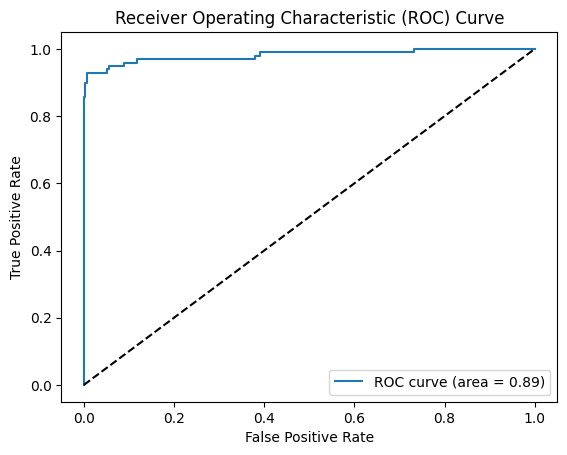

In [18]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
print(f"AUC Score: {auc_score}")

AUC Score: 0.8927516279443685


Comments:<br>The AUC Score is 0.892 which is close to 1. This means that the model is able to distinguish between the positive and negative class very well.<br>We can say that it is a well-performing fraud detection model. 

#### 6. Apply a well-known technique to handle class imbalance and compare the model performance on the test set with and without this approach. Comment on your outcome.


In [20]:
from sklearn.utils.class_weight import compute_class_weight

In [21]:
# Using class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [22]:
# Train a logistic regression model with class weights
weighted_log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
weighted_log_reg.fit(X_train, y_train)
y_pred_weighted = weighted_log_reg.predict(X_test)

In [24]:
# Evaluate the model using performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted)}")
print(f"Precision: {precision_score(y_test, y_pred_weighted)}")
print(f"Recall: {recall_score(y_test, y_pred_weighted)}")
print(f"F1-Score: {f1_score(y_test, y_pred_weighted)}")

Accuracy: 0.9703310979249324
Precision: 0.05129650507328072
Recall: 0.9285714285714286
F1-Score: 0.09722222222222221


In [26]:
# Compute and print AUC re-evaluation with class weights
weighted_auc_score = roc_auc_score(y_test, weighted_log_reg.predict_proba(X_test)[:, 1])
print(f"Weighted Logistic Regression AUC Score: {weighted_auc_score}")

# Compare the outcomes
print(f"AUC Score improvement after handling class imbalance: {weighted_auc_score - auc_score}")

Weighted Logistic Regression AUC Score: 0.98264243795436
AUC Score improvement after handling class imbalance: 0.08989081000999155


Comments:<br>The AUC Score before handling the class imbalance was 0.892; after handling the class imbalance, it was 0.982, and it improved by 0.089.

#### 8. Try the KNN and SVM classification compare their performance to the logistic regression baseline.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
# Train and evaluate KNN
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(f"KNN 5-fold CV Accuracy: {np.mean(knn_scores)}")

KNN 5-fold CV Accuracy: 0.9994601593188353


In [29]:
# Train and evaluate SVM
svm = SVC(probability=True)
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print(f"SVM 5-fold CV Accuracy: {np.mean(svm_scores)}")

SVM 5-fold CV Accuracy: 0.9993899361407974


In [30]:
# Fit models to the training set
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions on test set
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [33]:
# Evaluate
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"KNN Precision: {precision_score(y_test, y_pred_knn)}")
print(f"KNN Recall: {recall_score(y_test, y_pred_knn)}")
print(f"KNN F1-Score: {f1_score(y_test, y_pred_knn)}")

print(f"\nSVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"SVM Precision: {precision_score(y_test, y_pred_svm)}")
print(f"SVM Recall: {recall_score(y_test, y_pred_svm)}")
print(f"SVM F1-Score: {f1_score(y_test, y_pred_svm)}")

KNN Accuracy: 0.9994382219725431
KNN Precision: 0.8837209302325582
KNN Recall: 0.7755102040816326
KNN F1-Score: 0.826086956521739

SVM Accuracy: 0.999403110845827
SVM Precision: 0.8478260869565217
SVM Recall: 0.7959183673469388
SVM F1-Score: 0.8210526315789473


In [32]:
# Compute and print AUC Scores
auc_score_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
auc_score_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])

print(f"KNN AUC Score: {auc_score_knn}")
print(f"SVM AUC Score: {auc_score_svm}")

KNN AUC Score: 0.9182341074443284
SVM AUC Score: 0.9568189191827546
